In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def relax(initial_array, tolerance=1e-6, n=50):
    '''Relaxation method for solving Laplace's equation in 1D. 
    Requires the initial array and the tolerance.'''
    
    a = initial_array.copy() # to avoid overwriting the initial array
    convergence = False # to check if the solution has converged
    iterations = 0  # to count the number of iterations
    arrays = [a.copy()]  # to store the array at each iteration
    while not convergence:
        
        # Compute the average of the two neighboring points
        # as long as they are not boundaries
        # and do so until you reach the desired tolerance
        iterations += 1
        new_a = a.copy()
        
        # Computing the average of the two neighboring points
        for i in range(1, len(a) - 1):  # Excluding boundaries
            new_a[i] = 0.5 * (a[i - 1] + a[i + 1])
        
        # checking if the solution has converged (i.e., achieved the desired tolerance)
        # this is point by point convergence (See why?)
        convergence = np.all(np.abs(new_a - a) < tolerance)
        
        a = new_a.copy()
        
        # store every nth iteration (default is 50)
        if iterations % n == 0:
            arrays.append(a.copy())
    
    return arrays, iterations

In [3]:
def plot_relaxation(arrays, total_iterations):
    print(f'The solution converged after {total_iterations} iterations.')

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(arrays)))  # Create a colormap for the iterations

    for i, array in enumerate(arrays):
        ax.plot(array, color=colors[i], label=f'Iteration: {i}')
    
    ax.set_title('Relaxation Method: Overlaid Iterations')
    ax.set_xlabel('Position (x)')
    ax.set_ylabel('Electric Potential (V)')
    
    return fig, ax

The solution converged after 21980 iterations.


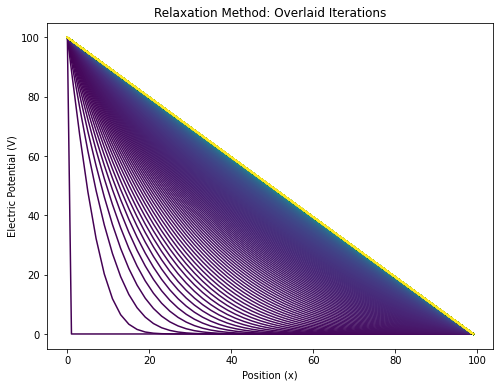

In [4]:
N = 100 # number of grid points
arr = np.zeros(N) # initial array
tol = 1e-6 # tolerance
n = 50 # store every nth iteration

# Boundary conditions
arr[0] = 100 # left boundary (100 V)
arr[-1] = 0 # right boundary (0 V)

arrays, total_iterations = relax(arr, tol, n)
plot_relaxation(arrays, total_iterations);

The solution converged after 22436 iterations.


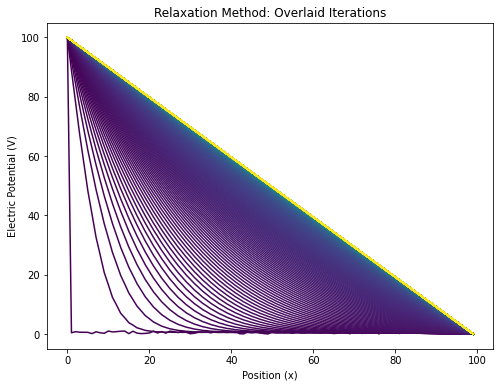

In [5]:
N = 100 # number of grid points
arr = np.random.rand(N) # initial array
tol = 1e-6 # tolerance
n = 50 # store every nth iteration

# Boundary conditions
arr[0] = 100 # left boundary (100 V)
arr[-1] = 0 # right boundary (0 V)

arrays, total_iterations = relax(arr, tol, n)
plot_relaxation(arrays, total_iterations);

The solution converged after 21980 iterations.


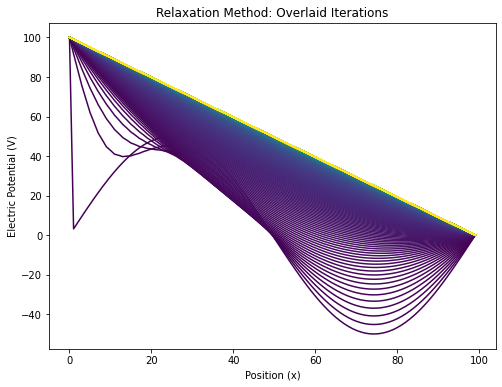

In [6]:
N = 100 # number of grid points
x = np.linspace(0, 2*np.pi, N)
arr = 50*np.sin(x) # initial array
tol = 1e-6 # tolerance
n = 50 # store every nth iteration

# Boundary conditions
arr[0] = 100 # left boundary (100 V)
arr[-1] = 0 # right boundary (0 V)

arrays, total_iterations = relax(arr, tol, n)
plot_relaxation(arrays, total_iterations);

The solution converged after 1 iterations.


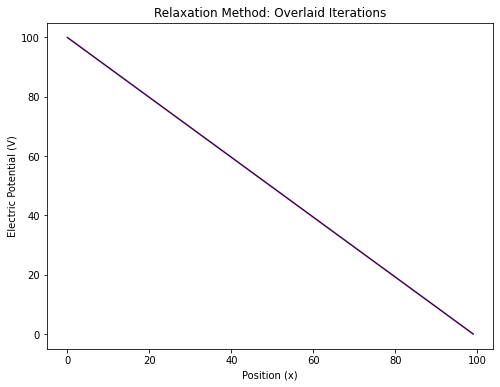

In [7]:
N = 100 # number of grid points
x = np.linspace(0, N, N)
arr = -x+100 # initial array
tol = 1e-6 # tolerance
n = 50 # store every nth iteration

# Boundary conditions
arr[0] = 100 # left boundary (100 V)
arr[-1] = 0 # right boundary (0 V)

arrays, total_iterations = relax(arr, tol, n)
plot_relaxation(arrays, total_iterations);

The solution converged after 14154 iterations.


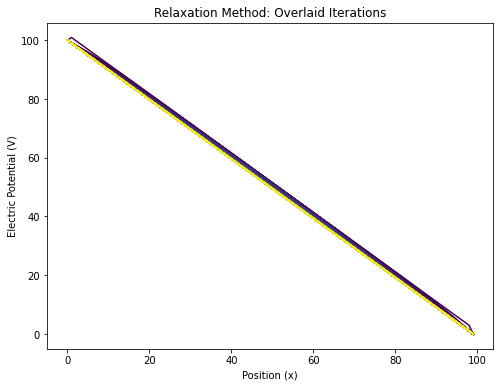

In [8]:
N = 100 # number of grid points
x = np.linspace(0, N, N)
gamma = 2 # strength of noise
arr = -x+100+gamma*np.random.rand() # initial array
tol = 1e-6 # tolerance
n = 50 # store every nth iteration

# Boundary conditions
arr[0] = 100 # left boundary (100 V)
arr[-1] = 0 # right boundary (0 V)

arrays, total_iterations = relax(arr, tol, n)
plot_relaxation(arrays, total_iterations);

The solution converged after 7216 iterations.


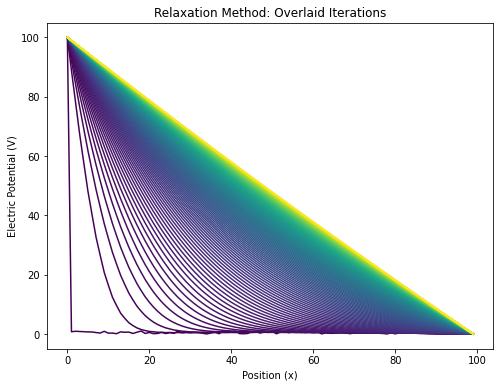

In [9]:
N = 100 # number of grid points
arr = np.random.rand(N) # initial array
tol = 1e-3 # tolerance
n = 50 # store every nth iteration

# Boundary conditions
arr[0] = 100 # left boundary (100 V)
arr[-1] = 0 # right boundary (0 V)

arrays, total_iterations = relax(arr, tol, n)
plot_relaxation(arrays, total_iterations);